In [9]:
# %%

# Import necessary libraries
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from itertools import product
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from tensorflow.keras.callbacks import TensorBoard
import datetime
log_dir = os.path.join('logs', 'fit', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(log_dir)
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Set the path to the data directory
PATH = os.path.join('data')

# Create an array of actions (signs) labels by listing the contents of the data directory
actions = np.array(os.listdir(PATH))

# Define the number of sequences and frames
# sequences = 30
# frames = 30

# Create a label map to map each action label to a numeric value
label_map = {label:num for num, label in enumerate(actions)}

# Initialize empty lists to store landmarks and labels
landmarks, labels = [], []

# Iterate over actions and sequences to load landmarks and corresponding labels
for action in actions:
    action_path = os.path.join(PATH, action)
    
    # List all directories for the current action
    sequences = os.listdir(action_path)
    
    # Iterate over each sequence for the current action
    for sequence in sequences:
        temp = []
        sequence_path = os.path.join(action_path, sequence)
        
        # List all frames in the current sequence
        frames = sorted(os.listdir(sequence_path))  # Sort to ensure the frames are in order
        
        # Load all frames for the current sequence
        for frame in frames:
            npy_path = os.path.join(sequence_path, frame)
            if os.path.isfile(npy_path):  # Check if the path is indeed a file
                npy = np.load(npy_path)
                temp.append(npy)
        
        # Append landmarks and corresponding label only if temp is not empty
        if temp:
            landmarks.append(temp)
            labels.append(label_map[action])

# Convert landmarks and labels to numpy arrays
X, Y = np.array(landmarks), to_categorical(labels).astype(int)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=34, stratify=Y)

# Define the model architecture
model = Sequential()
model.add(LSTM(32, return_sequences=True, activation='relu', input_shape=(10,126)))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(32, return_sequences=False, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# Train the model
model.fit(X_train, Y_train, epochs=200, callbacks=[tensorboard_callback])

# Save the trained model
model.save('my_model_4_1.keras')

# Make predictions on the test set
predictions = np.argmax(model.predict(X_test), axis=1)
# Get the true labels from the test set
test_labels = np.argmax(Y_test, axis=1)

# Calculate the accuracy of the predictions
accuracy = metrics.accuracy_score(test_labels, predictions)


logs\fit\20240428-174902


c:\Users\48732\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - categorical_accuracy: 0.0406 - loss: 3.5920
Epoch 2/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - categorical_accuracy: 0.0985 - loss: 3.2405
Epoch 3/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - categorical_accuracy: 0.1239 - loss: 3.1364
Epoch 4/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - categorical_accuracy: 0.1966 - loss: 2.6448
Epoch 5/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - categorical_accuracy: 0.2473 - loss: 2.3468
Epoch 6/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - categorical_accuracy: 0.3324 - loss: 2.0595
Epoch 7/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - categorical_accuracy: 0.4256 - loss: 1.6587
Epoch 8/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - categorical_accuracy: 0.4794 - loss: 1.5963
Epoch 9/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - categorical_accuracy: 0.1467 - loss: 7.1622
Epoch 10/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - categorical_accuracy: 0.3238 - loss: 2.1449
Epoch 11/200
64/64

In [12]:
accuracy

0.8539823008849557

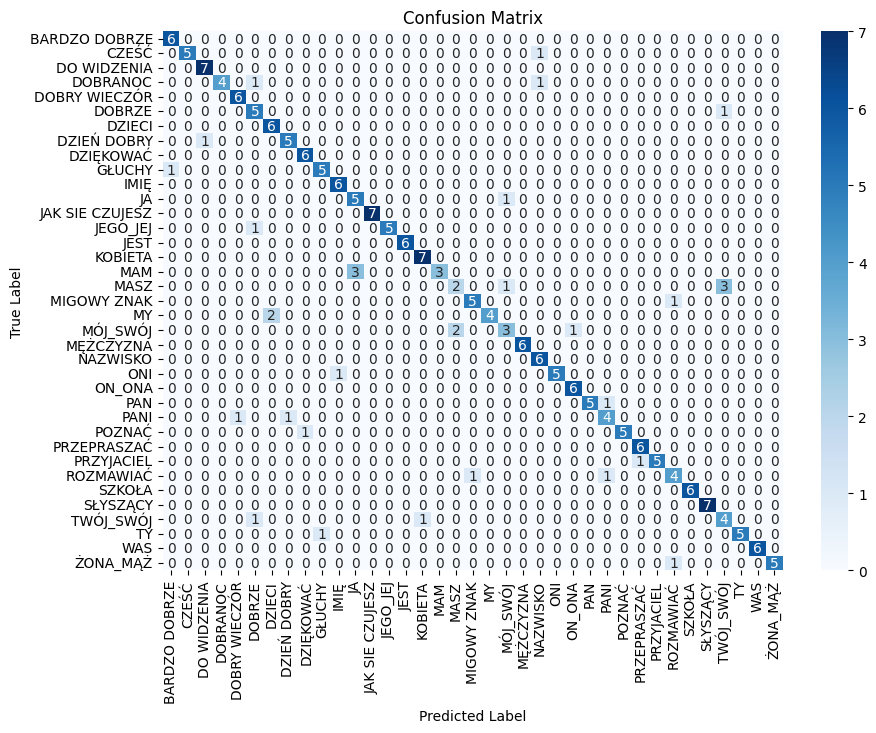

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Obliczenie confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Etykiety dla osi w wykresie
labels = actions

# Wyświetlanie confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [11]:
import json

with open('labels_my_model_4.json', 'w') as f:
    json.dump(label_map, f)
